Генерация данных

In [1]:
import numpy as np
import scipy
from scipy import stats
import math
import sympy as sp
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

n, m1, m2 = 40, 3, 2
# Данные (вариант 10):
theta0 = -5
theta1, theta2, theta3 = 4, -1, -0.02
sigma_2 = 1.1

th = [theta0, theta1, theta2, theta3]

th1, th2 = [], []
for i in range(m1 + 1):
    th1.append(th[i])

for i in range(m2 + 1):
    th2.append((th[i]))

Th1 = np.array(th1).reshape(m1 + 1, 1)
Th2 = np.array(th2).reshape(m2 + 1, 1)

np.random.seed(0)
err1 = np.random.normal(0, math.sqrt(sigma_2), n).reshape(n, 1)  # ошибки 1 случай
np.random.seed(12)
Err2 = np.random.uniform(-math.sqrt(3 * sigma_2), math.sqrt(3 * sigma_2), 10000)

err2 = []
for i in range(n):
    err2.append(Err2[i])

err2 = np.array(err2).reshape(n, 1)  # ошибки 2 случай

# X
X = np.zeros((n, 1))
for k in range(1, n + 1):
    X[k - 1] = -4 + k * 8 / n

A1 = np.zeros((n, m1 + 1))
A2 = np.zeros((n, m2 + 1))
for i in range(n):
    for j in range(m1 + 1):
        A1[i][j] = pow(X[i], j)

    for j in range(m2 + 1):
        A2[i][j] = pow(X[i], j)

Y1 = np.dot(A1, Th1) + err1  # Y 1 случай
Y2 = np.dot(A2, Th2) + err2  # Y 2 случай

Функция для выполнения задания 1

In [2]:
def First_task(Y):
    global X, n
    
    p = 1
    Th_mnk_prev, ATA__1_prev, S_prev = None, None, None
    while True:
        A = np.zeros((n, p + 1))
        for i in range(n):
            for j in range(p + 1):
                A[i][j] = pow(X[i], j)

        ATA__1 = np.linalg.inv(np.dot(A.T, A))
        ATY = np.dot(A.T, Y)
        Th_mnk = np.dot(ATA__1, ATY)
        S = np.dot((Y - np.dot(A, Th_mnk)).T, Y - np.dot(A, Th_mnk))
        Z = (pow(Th_mnk[p], 2) * (n - (p + 1)) / (ATA__1[p][p] * S))[0][0]
        Z_crit = scipy.stats.f.ppf(q=0.95, dfn=1, dfd=n - (p + 1))
        
        if (Z > Z_crit):
            print('p = {}: {} > {}'.format(p, Z, Z_crit))
            p += 1
            Th_mnk_prev = Th_mnk
            ATA__1_prev = ATA__1
            S_prev = S
        else:
            print('p = {}: {} <= {}. Гипотеза H0 принимается'.format(p, Z, Z_crit))
            break

    return p - 1, np.round(Th_mnk_prev, 4), ATA__1_prev, S_prev

Функция для выполнения задания 2

In [3]:
def Second_task(m_res, Th_res, ATA__1, S):
    global n
    
    quant_t1 = scipy.stats.t.ppf(q=0.975, df=n - (m_res + 1))
    quant_t2 = scipy.stats.t.ppf(q=0.995, df=n - (m_res + 1))
    
    print('Для уровня надежности alpha1 = 0.95:')
    for i in range(m_res + 1):
        print('Для theta{}'.format(i))
        print('Нижняя граница: ', Th_res[i] - quant_t1 * math.sqrt(ATA__1[i][i] * S / (n - (m_res + 1))))
        print('Верхняя граница: ', Th_res[i] + quant_t1 * math.sqrt(ATA__1[i][i] * S / (n - (m_res + 1))))
    
    print('Для уровня надежности alpha2 = 0.99:')
    for i in range(m_res + 1):
        print('Для theta{}'.format(i))
        print('Нижняя граница: ', Th_res[i] - quant_t2 * math.sqrt(ATA__1[i][i] * S / (n - (m_res + 1))))
        print('Верхняя граница: ', Th_res[i] + quant_t2 * math.sqrt(ATA__1[i][i] * S / (n - (m_res + 1))))
    
    return quant_t1, quant_t2

Функция для выполнения задания 3

In [4]:
def Third_task(m_res, Th_res, ATA__1, S, quant_t1, quant_t2):
    global n
    
    x = sp.Symbol('x')
    f = []
    for i in range(m_res + 1):
        f.append([pow(x, i)])
    
    f = sp.Matrix(f)
    expr1 = (f.T * sp.Matrix(Th_res))[0]
    expr2 = sp.simplify(sp.Matrix(S) * f.T * sp.Matrix(ATA__1) * f / (n - (m_res + 1)))[0]
    
    print('Для уровня надежности alpha1 = 0.95')
    print('Нижняя граница интервала полезного сигнала: {} - {} * sqrt({})'.format(expr1, quant_t1, expr2))
    print('Верхняя граница интервала полезного сигнала: {} + {} * sqrt({})'.format(expr1, quant_t1, expr2))
    print()
    print('Для уровня надежности alpha2 = 0.99')
    print('Нижняя граница интервала полезного сигнала: {} - {} * sqrt({})'.format(expr1, quant_t2, expr2))
    print('Верхняя граница интервала полезного сигнала: {} + {} * sqrt({})'.format(expr1, quant_t2, expr2))
    
    return expr1, expr2


Функция для выполнения задания 4

In [5]:
def Fourth_task(expr1, expr2, quant_t1, quant_t2, m, Th, m_res, Th_res, Y):
    global X
    
    Low1 = expr1 - quant_t1 * sp.sqrt(expr2)
    High1 = expr1 + quant_t1 * sp.sqrt(expr2)
    
    Low2 = expr1 - quant_t2 * sp.sqrt(expr2)
    High2 = expr1 + quant_t2 * sp.sqrt(expr2)
    
    x = sp.Symbol('x')
    
    phi_real, phi_est = [], []
    conf_low1, conf_high1 = [], []
    conf_low2, conf_high2 = [], []
    for i in range(n):
        f_n = []
        for j in range(m + 1):
            f_n.append(pow(X[i], j))
        phi_real.append(np.dot((np.array(f_n).reshape(m + 1, 1)).T, Th)[0][0])
        
        f_n = []
        for j in range(m_res + 1):
            f_n.append(pow(X[i], j))
        phi_est.append(np.dot((np.array(f_n).reshape(m_res + 1, 1)).T, Th_res)[0][0])
        
        conf_low1.append(sp.lambdify(x, Low1)(X[i]))
        conf_high1.append(sp.lambdify(x, High1)(X[i]))
        conf_low2.append(sp.lambdify(x, Low2)(X[i]))
        conf_high2.append(sp.lambdify(x, High2)(X[i]))
    
    fig1 = plt.figure(figsize=[12, 10])
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.set_title('Уровень надежности alpha1 = 0.95')
    plt.scatter(X, Y, c='red', s=20, linewidths=1.0, label='Набор наблюдений')
    plt.plot(X, phi_real, label='Истинный полезный сигнал')
    plt.plot(X, phi_est, label='Оценка полезного сигнала')
    plt.plot(X, conf_low1, label='Нижняя граница доверительного интервала полезного сигнала')
    plt.plot(X, conf_high1, label='Верхняя граница доверительного интервала полезного сигнала')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    
    fig2 = plt.figure(figsize=[12, 10])
    ax2 = fig2.add_subplot(1, 1, 1)
    ax2.set_title('Уровень надежности alpha2 = 0.99')
    plt.scatter(X, Y, c='red', s=20, linewidths=1.0, label='Набор наблюдений')
    plt.plot(X, phi_real, label='Истинный полезный сигнал')
    plt.plot(X, phi_est, label='Оценка полезного сигнала')
    plt.plot(X, conf_low2, label='Нижняя граница доверительного интервала полезного сигнала')
    plt.plot(X, conf_high2, label='Верхняя граница доверительного интервала полезного сигнала')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()

Функция для выполнения задания 5

In [6]:
def Fifth_task(m_res, Th_res, Y):
    global n
    
    l = round((3.32 * math.log10(n) + 1 + math.sqrt(n) + 1) / 2) - 1
    
    A_res = np.zeros((n, m_res + 1))
    for i in range(n):
        for j in range(m_res + 1):
            A_res[i][j] = pow(X[i], j)
    
    E_rem = Y - np.dot(A_res, Th_res)
    E_res = E_rem.T[0][:]
    delta = (max(E_res) - min(E_res)) / l
    
    X_coord = []
    X_coord.append(min(E_res) - delta)
    for i in range(l):
        X_coord.append(min(E_res) + i * delta)
    X_coord.append(max(E_res))
    
    E_sorted = sorted(E_res)
    X_num = [0] * l

    bar = 0
    w = 0
    while w < n:
        if (bar != (l - 1)):
            if (E_sorted[w] >= X_coord[1 + bar]) and (E_sorted[w] < X_coord[2 + bar]):
                X_num[bar] += 1
            else:
                bar += 1
                continue
        else:
            if (E_sorted[w] >= X_coord[1 + bar]) and (E_sorted[w] <= X_coord[2 + bar]):
                X_num[bar] += 1
        w += 1
    
    Y_coord = []
    Y_coord.append(0)
    for i in range(l):
        Y_coord.append(X_num[i] / (n * delta))
    Y_coord.append(0)
    
    plt.bar(X_coord, Y_coord, delta, edgecolor='black')
    plt.show()
    return E_rem, X_coord, X_num, l

Функция для выполнения задания 6

In [16]:
def Sixth_task(Err):
    global n
    
    Var_mp = 1/n * sum(Err**2)[0]
    print('Оценка методом МП дисперсии случайной ошибки =', Var_mp)
    return Var_mp

Функция для выполнения задания 7

In [29]:
def Seventh_task(E_rem, X_coord, X_num, l, Var):
    global n
    
    prob = []
    for i in range(len(X_coord)):
        if (i == 0):
            prob.append(scipy.stats.norm.cdf(X_coord[i + 1] / math.sqrt(Var)) - scipy.stats.norm.cdf(-math.inf))
        elif (i == (len(X_coord) - 1)):
            prob.append(scipy.stats.norm.cdf(math.inf) - scipy.stats.norm.cdf(X_coord[i] / math.sqrt(Var)))
        else:
            prob.append(scipy.stats.norm.cdf(X_coord[i + 1] / math.sqrt(Var))
                    - scipy.stats.norm.cdf(X_coord[i] / math.sqrt(Var)))
    
    Z = n * prob[0]
    for k in range(len(X_coord) - 2):
        Z += (X_num[k] - n * prob[k + 1])**2 / (n * prob[k + 1])
    Z += n * prob[len(prob) - 1]

    l_new = l + 1
    Z_crit = scipy.stats.chi2.ppf(q=0.95, df=l_new - 1)
    
    if (Z <= Z_crit):
        print('Закон распределения ошибки наблюдения является нормальным')
    else:
        print('Закон распределения ошибки наблюдения не является нормальным')

    

Для Случая 1

In [9]:
# Задание 1
m_res, Th_res, ATA__1, S = First_task(Y1)
print('Оценки параметров: ', Th_res)

p = 1: 109.90968741913916 > 4.098171730880841
p = 2: 657.6080792432299 > 4.105455897235966
p = 3: 2.547527805948158 <= 4.1131652768128895. Гипотеза H0 принимается
Оценки параметров:  [[-4.8616]
 [ 3.6702]
 [-0.9643]]


In [10]:
# Задание 2
quant_t1, quant_t2 = Second_task(m_res, Th_res, ATA__1, S)

Для уровня надежности alpha1 = 0.95:
Для theta0
Нижняя граница:  [-5.40589875]
Верхняя граница:  [-4.31730125]
Для theta1
Нижняя граница:  [3.51227202]
Верхняя граница:  [3.82812798]
Для theta2
Нижняя граница:  [-1.04049508]
Верхняя граница:  [-0.88810492]
Для уровня надежности alpha2 = 0.99:
Для theta0
Нижняя граница:  [-5.59104382]
Верхняя граница:  [-4.13215618]
Для theta1
Нижняя граница:  [3.45855228]
Верхняя граница:  [3.88184772]
Для theta2
Нижняя граница:  [-1.0664131]
Верхняя граница:  [-0.8621869]


In [11]:
# Задание 3
expr1, expr2 = Third_task(m_res, Th_res, ATA__1, S, quant_t1, quant_t2)

Для уровня надежности alpha1 = 0.95
Нижняя граница интервала полезного сигнала: -0.9643*x**2 + 3.6702*x - 4.8616 - 2.0261924630291093 * sqrt(0.00141414024464115*x**4 - 0.000565656097856461*x**3 - 0.00897130571200347*x**2 + 0.00180557426435782*x + 0.072162784765501)
Верхняя граница интервала полезного сигнала: -0.9643*x**2 + 3.6702*x - 4.8616 + 2.0261924630291093 * sqrt(0.00141414024464115*x**4 - 0.000565656097856461*x**3 - 0.00897130571200347*x**2 + 0.00180557426435782*x + 0.072162784765501)

Для уровня надежности alpha2 = 0.99
Нижняя граница интервала полезного сигнала: -0.9643*x**2 + 3.6702*x - 4.8616 - 2.7154087215499616 * sqrt(0.00141414024464115*x**4 - 0.000565656097856461*x**3 - 0.00897130571200347*x**2 + 0.00180557426435782*x + 0.072162784765501)
Верхняя граница интервала полезного сигнала: -0.9643*x**2 + 3.6702*x - 4.8616 + 2.7154087215499616 * sqrt(0.00141414024464115*x**4 - 0.000565656097856461*x**3 - 0.00897130571200347*x**2 + 0.00180557426435782*x + 0.072162784765501)


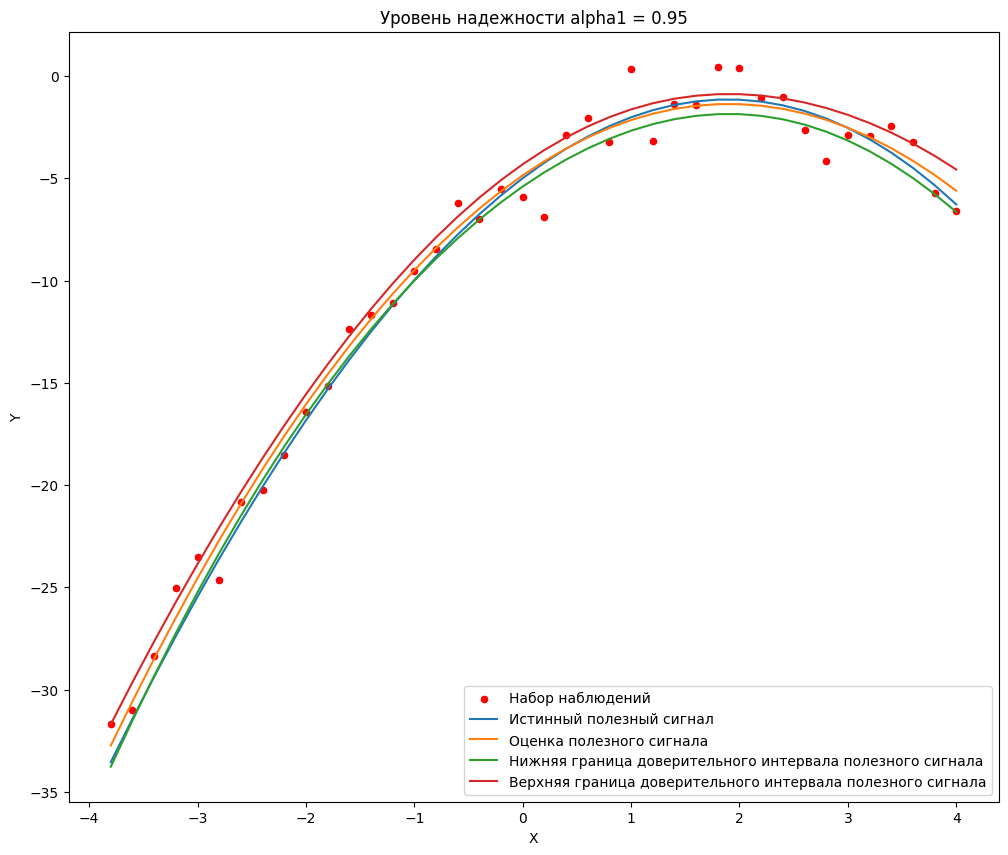

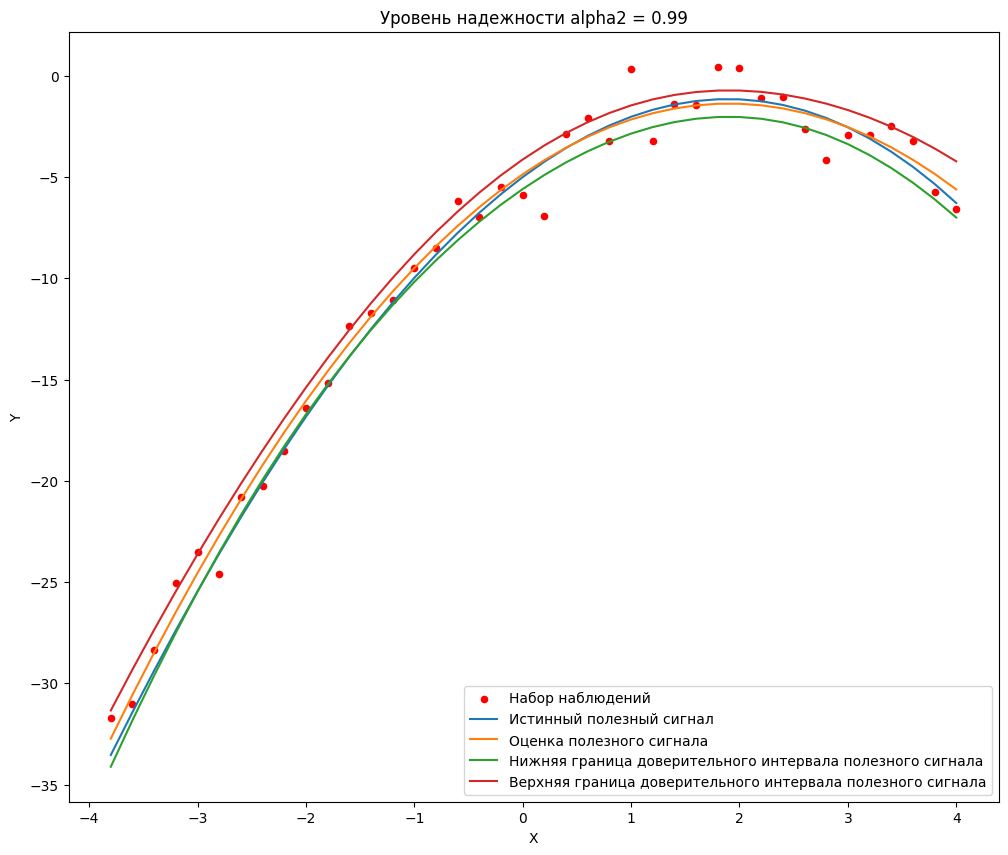

In [12]:
# Задание 4
Fourth_task(expr1, expr2, quant_t1, quant_t2, m1, Th1, m_res, Th_res, Y1)

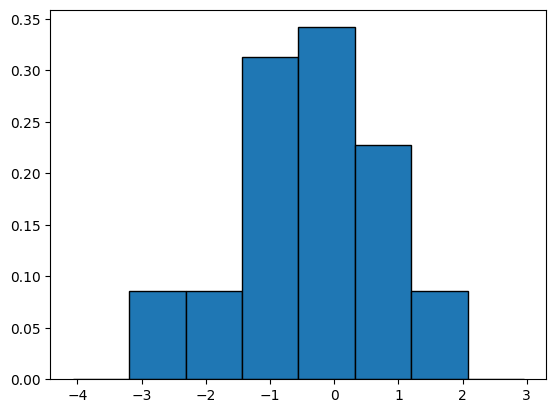

In [13]:
# Задание 5
E_rem, X_coord, X_num, l = Fifth_task(m_res, Th_res, Y1)

In [20]:
# Задание 6
Var = Sixth_task(err1)

Оценка методом МП дисперсии случайной ошибки = 1.3535382910777285


In [21]:
# Задание 7
Seventh_task(E_rem, X_coord, X_num, l, Var)

[0.009011982402746933, 0.04463555026752891, 0.14240207926993836, 0.2636612393466219, 0.28356964497414117, 0.17717567548409374, 0.0642655855241302, 0.015278242730798808]
3.3208887519714025
12.591587243743977
Закон распределения ошибки наблюдения является нормальным


Для Случая 2

In [22]:
# Задание 1
m_res, Th_res, ATA__1, S = First_task(Y2)
print('Оценки параметров: ', Th_res)

p = 1: 134.3324514129216 > 4.098171730880841
p = 2: 672.3804576799329 > 4.105455897235966
p = 3: 0.3379782937816144 <= 4.1131652768128895. Гипотеза H0 принимается
Оценки параметров:  [[-5.094 ]
 [ 4.0792]
 [-0.9749]]


In [23]:
# Задание 2
quant_t1, quant_t2 = Second_task(m_res, Th_res, ATA__1, S)

Для уровня надежности alpha1 = 0.95:
Для theta0
Нижняя граница:  [-5.638195]
Верхняя граница:  [-4.549805]
Для theta1
Нижняя граница:  [3.92130213]
Верхняя граница:  [4.23709787]
Для theta2
Нижняя граница:  [-1.05108056]
Верхняя граница:  [-0.89871944]
Для уровня надежности alpha2 = 0.99:
Для theta0
Нижняя граница:  [-5.82330478]
Верхняя граница:  [-4.36469522]
Для theta1
Нижняя граница:  [3.86759263]
Верхняя граница:  [4.29080737]
Для theta2
Нижняя граница:  [-1.07699363]
Верхняя граница:  [-0.87280637]


In [24]:
# Задание 3
expr1, expr2 = Third_task(m_res, Th_res, ATA__1, S, quant_t1, quant_t2)

Для уровня надежности alpha1 = 0.95
Нижняя граница интервала полезного сигнала: -0.9749*x**2 + 4.0792*x - 5.094 - 2.0261924630291093 * sqrt(0.00141360118124629*x**4 - 0.000565440472498518*x**3 - 0.0089678858938265*x**2 + 0.00180488598821527*x + 0.0721352766623369)
Верхняя граница интервала полезного сигнала: -0.9749*x**2 + 4.0792*x - 5.094 + 2.0261924630291093 * sqrt(0.00141360118124629*x**4 - 0.000565440472498518*x**3 - 0.0089678858938265*x**2 + 0.00180488598821527*x + 0.0721352766623369)

Для уровня надежности alpha2 = 0.99
Нижняя граница интервала полезного сигнала: -0.9749*x**2 + 4.0792*x - 5.094 - 2.7154087215499616 * sqrt(0.00141360118124629*x**4 - 0.000565440472498518*x**3 - 0.0089678858938265*x**2 + 0.00180488598821527*x + 0.0721352766623369)
Верхняя граница интервала полезного сигнала: -0.9749*x**2 + 4.0792*x - 5.094 + 2.7154087215499616 * sqrt(0.00141360118124629*x**4 - 0.000565440472498518*x**3 - 0.0089678858938265*x**2 + 0.00180488598821527*x + 0.0721352766623369)


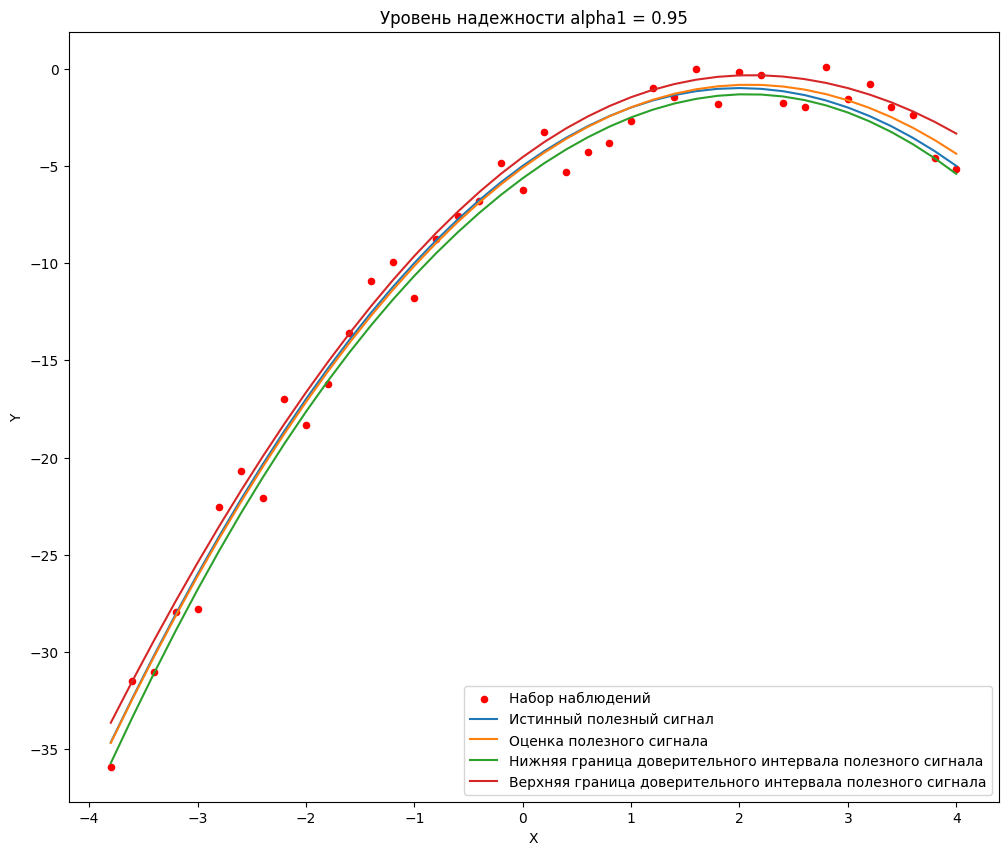

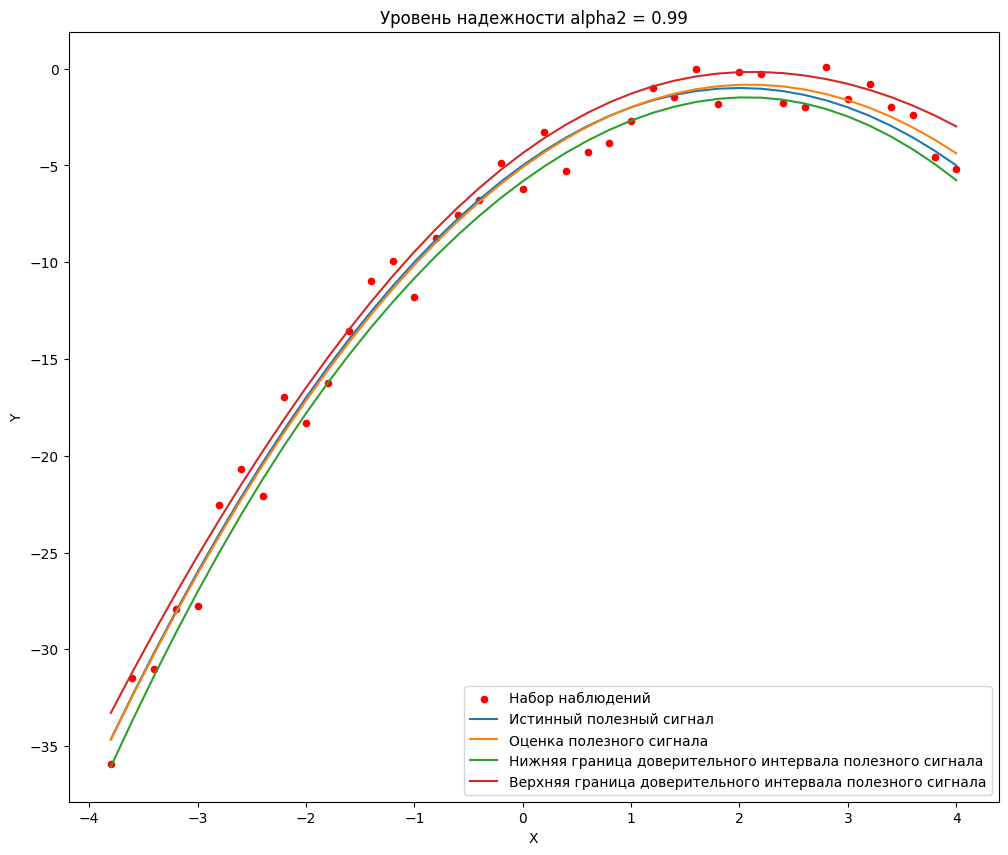

In [25]:
# Задание 4
Fourth_task(expr1, expr2, quant_t1, quant_t2, m2, Th2, m_res, Th_res, Y2)

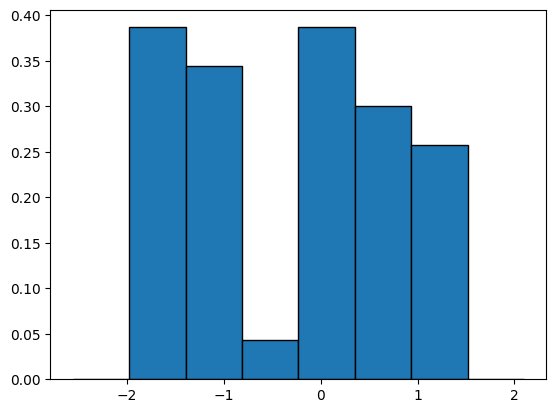

In [26]:
# Задание 5
E_rem, X_coord, X_num, l = Fifth_task(m_res, Th_res, Y2)

In [27]:
# Задание 6
Var = Sixth_task(err2)

Оценка методом МП дисперсии случайной ошибки = 1.240813896697999


In [30]:
# Задание 7
Seventh_task(E_rem, X_coord, X_num, l, Var)

Закон распределения ошибки наблюдения не является нормальным
